## Data Story

door groep N2:
- Abe Dijkstra
- Shilana Rajabi Haji Khosh:
- Sem Loogman
- Sam Zwarts

# Introductie

Hoe het hoger onderwijs moet worden gefinancierd is al lange tijd een lastig onderwerp in Nederland. Moeten de studenten zelf hun geld lenen of is een donatie van de overheid (oftewel een beurs) een betere optie? Sinds 1 september 2015 wordt het leenstelsel gebruikt in Nederland. Hierbij kan de student voor een relatief lage rente geld lenen tijdens de studiejaren. Op dit moment is dit 0,46% rente per jaar. Ook zijn er mogelijkheden voor een aanvullende beurs aan de hand van het inkomen van de ouders van de student en wordt het gebruik van openbaar vervoer vergoed. 
Dit systeem gaat veranderen dit jaar, de basisbeurs wordt weer ingevoerd. Nederland gebruikte een vergelijkbaar systeem voordat het leenstelsel werd ingevoerd. Hierbij zullen studenten een bedrag van €274,90 krijgen per maand als ze uitwonend zijn of €110,30 als ze thuiswonend zijn (Ministerie van Algemene Zaken, 2023). Dit bedrag wordt omgezet naar een gift als de studenten binnen 10 jaar hun diploma halen. Dit betekent dat de studenten dus weer ‘gratis’ geld gaan krijgen elke maand. 
Deze verandering heeft veel tijd gekost in de politiek en is uiteindelijk ontstaan wegens onvrede met het leenstelsel. Maar is deze onvrede wel terecht? Is het leenstelsel een negatief systeem voor studenten? Om hierachter te komen zullen wij de periode rond het invoeren van het leenstelsel onderzoeken. Hierbij zullen wij twee verschillende perspectieven aanhouden. Volgens ons eerste perspectief was het leenstelsel vooruitgang vergeleken met de voorgaande basisbeurs. Volgens ons tweede perspectief was het leenstelsel een achteruitgang vergeleken met de voorgaande basisbeurs. 


# Dataset en voorbereiding

Om te bepalen wat de invloed was van het invoeren van het leenstelsel op het aantal studenten in Nederland is gebruikgemaakt van een database van het CBS (Leerlingen En Studenten; Onderwijssoort, Woonregio, n.d.). Deze database bevat informatie over het aantal leerlingen en studenten in de regio’s binnen Nederland en in het totaal. Deze database is eerst voorbewerkt door de onderwijssoorten te reduceren naar ‘hoger beroepsonderwijs’ en ‘wetenschappelijk onderwijs’. Hiermee worden onderwijssoorten die niet beïnvloed waren door het leenstelsel eruit gefilterd. Ook wordt er alleen naar de locatie ‘Nederland’ gekeken omdat de regio’s zelf niet specifiek worden onderzocht.

# Visualisaties

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=80393ned&_theme=361
# Dataset voor grafische weergave:
# Onderwijssectoren = Hoger beroepsonderwijs & Wetenschappelijk onderwijs
spendings = pd.read_csv('spendings.csv', delimiter=';', quotechar='"')

# https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=71450ned&_theme=344
# Dataset voor grafische weergave:
# Geslacht = Totaal mannen en vrouwen
# Leeftijd = Totaal
# Onderwijssoort = Hoger beroepsonderwijs & Wetenschappelijk onderwijs
# Regio's = Nederland
students = pd.read_csv('students.csv', delimiter=';', quotechar='"')

# Jaren in het goede formaat krijgen
spendings = spendings.assign(Perioden=spendings['Perioden'].str.removesuffix('JJ00'))
students = students.assign(Perioden=students['Perioden'].str.removesuffix('SJ00'))

# Schooljaren in plaats van hele jaren
students = students.assign(Perioden=students['Perioden'].apply(lambda periode: f'{periode[-2:]}/{str(int(periode) + 1)[-2:]}'))

# Uitgaven in miljoenen
spendings = spendings.assign(TotaalUitgavenAanOnderwijs_1=spendings['TotaalUitgavenAanOnderwijs_1'] * (10**6))
spendings = spendings.assign(TotaalOverheid_2=spendings['TotaalOverheid_2'] * (10**6))

In [112]:
students_relevant = students[['Perioden', 'LeerlingenStudenten_1']]
students_total = students_relevant.groupby('Perioden').sum().reset_index()

students_year = px.line(students_total, x='Perioden', y='LeerlingenStudenten_1', title='Aantal studenten aan hoger onderwijs in Nederland per jaar')
students_year.update_layout(xaxis_title='Schooljaren (2000\'s)')
students_year.update_layout(yaxis_title='Aantal studenten')
students_year.show()

_Perspectief 1: Het aantal studenten neemt elk jaar toe, zelfs rond de invoering van het leenstelsel. Het leenstelsel heeft er dus niet voor gezorgd dat er minder mensen zijn gaan studeren in Nederland. Het leenstelsel is dus niet nadelig vergeleken met de voorgaande basisbeurs volgens deze data._

In [113]:
df = students.sort_values('Perioden')
total_students_percentage = df.groupby('Perioden').sum(numeric_only=False)
total_students_percentage.to_csv('agstudents.csv')
df3 = pd.read_csv('agstudents.csv', delimiter=',')

df3['Leerling'] = df3['LeerlingenStudenten_1'].shift(1)
df3['Procentuele Toename'] = (((df3['Leerling'] - df3['LeerlingenStudenten_1']) / df3['LeerlingenStudenten_1']) * 100).abs()

fig = px.line(df3, x='Perioden',y='Procentuele Toename', title='Procentuele Toename van studenten per jaar', 
range_y=[df3['Procentuele Toename'].min() - 0.5, df3['Procentuele Toename'].max() + 0.5])
fig.update_layout(xaxis_title='Schooljaren (2000\'s)')
fig.update_layout(yaxis_title='percentuele toename studenten')
 
fig.show()

_Perspectief 2: De procentuele toename van alle studenten in Nederland is laag in het schooljaar 2015/’16 . Dit betekent dat er relatief weinig nieuwe studenten zijn bijgekomen in dat jaar. Deze relatief weinige toename in studenten is mogelijk veroorzaakt door de invoering van het leenstelsel._

In [114]:
spendings_relevant = spendings[['Perioden', 'TotaalOverheid_2']]
spendings_total = spendings_relevant.groupby('Perioden').sum().reset_index()
spendings_total = spendings_total.assign(Perioden=spendings_total['Perioden'].apply(lambda periode: f'{periode[-2:]}/{str(int(periode) + 1)[-2:]}'))
spendings_total = spendings_total.iloc[2:]

spendings_government_year = px.line(spendings_total, x='Perioden', y='TotaalOverheid_2', title='Uitgaven van de overheid aan hoger onderwijs in Nederland per jaar')
spendings_government_year.update_layout(xaxis_title='Schooljaren (2000\'s)')
spendings_government_year.update_layout(yaxis_title='Uitgaven overheid aan hoger onderwijs')
spendings_government_year.show()

_Perspectief 2: De toename van uitgaven in onderwijs door de overheid is erg onregelmatig rond de introductie van het leenstelsel. Er is een afname van uitgaven in de schooljaren 2015/’16 en 2017/’18. Een van de redenen om het leenstelsel in te voeren was dat het zou zorgen voor meer uitgaven aan onderwijs door de overheid. Dit is niet regelmatig gebeurd en was dus eigenlijk niet een sterk argument om het leenstelsel in te voeren._

In [115]:
spendings_education = spendings[['Perioden', 'TotaalUitgavenAanOnderwijs_1']]
spendings_edu_total = spendings_education.groupby('Perioden').sum().reset_index()
spendings_edu_total = spendings_edu_total.assign(Perioden=spendings_edu_total['Perioden'].apply(lambda periode: f'{periode[-2:]}/{str(int(periode) + 1)[-2:]}'))
spendings_edu_total = spendings_edu_total.iloc[2:]

spendings_education_year = px.line(spendings_edu_total, x='Perioden', y='TotaalUitgavenAanOnderwijs_1', title='Totale uitgaven aan hoger onderwijs in Nederland per jaar')
spendings_education_year.update_layout(xaxis_title='Schooljaren (2000\'s)')
spendings_education_year.update_layout(yaxis_title='Totale uitgaven aan hoger onderwijs')
spendings_education_year.show()

_Perspectief 1: De totale uitgaven aan tertiair onderwijs zijn elk jaar netjes toegenomen, ook rond de invoering van het leenstelsel. Het leenstelsel heeft het waarschijnlijk mogelijk gemaakt om deze toename door te kunnen trekken tot en met 2020. Als dit zo is geweest, dan is dit een groot voordeel geweest van het leenstelsel._

In [116]:
students_hbo = students[(students['Onderwijssoort'] == 'A025294') & (students['Migratieachtergrond'] == 'T001040')]

students_hbo_relevant = students_hbo[['Perioden', 'LeerlingenStudenten_1']]

students_hbo_year = px.line(students_hbo_relevant, x='Perioden', y='LeerlingenStudenten_1', title='Aantal studenten in het HBO in Nederland per jaar')
students_hbo_year.update_layout(xaxis_title='Schooljaren (2000\'s)')
students_hbo_year.update_layout(yaxis_title='Aantal studenten')
students_hbo_year.show()

_Perspectief 2: Het aantal studenten in het hoger beroepsonderwijs is afgenomen in het schooljaar 2015/’16. Dit is ook het jaar dat het leenstelsel is ingevoerd. Het is dus mogelijk dat er minder mensen zijn gaan studeren in het hoger beroepsonderwijs door de invoering van het leenstelsel._

In [117]:
uitgaven = spendings.copy()
studenten = pd.read_csv('students.csv', delimiter=';', quotechar='"')

studenten = studenten.assign(Perioden=studenten['Perioden'].str.removesuffix('SJ00'))

#totaal aantal studenten per jaar
studenten_per_jaar = studenten.iloc[:46, :]
studenten_per_jaar = studenten_per_jaar.groupby('Perioden')['LeerlingenStudenten_1'].sum().reset_index()

#relevante onderwerpen in uitgaven
relevantekolommen = ['StudiefinancieringLeningen_14', 'AflossingenOpStudieleningen_30', 'StudiefinancieringGiften_13', 'RenteOpStudieleningen_18']
relevant_uitgaven = uitgaven.groupby('Perioden')[relevantekolommen].sum().reset_index()

#mergen aantal studenten per jaar en relevante onderwerpen in uitgaven
merged_spj_uitgaven = pd.merge(studenten_per_jaar, relevant_uitgaven, on='Perioden')

#avg schuld per student kolom toevoegen
merged_spj_uitgaven['avg_debt_per_student'] = (merged_spj_uitgaven['StudiefinancieringLeningen_14'] / merged_spj_uitgaven["LeerlingenStudenten_1"])*1000000

#van jaren naar schooljaren
merged_spj_uitgaven = merged_spj_uitgaven.assign(Perioden=merged_spj_uitgaven['Perioden'].apply(lambda periode: f'{periode[-2:]}/{str(int(periode) + 1)[-2:]}'))

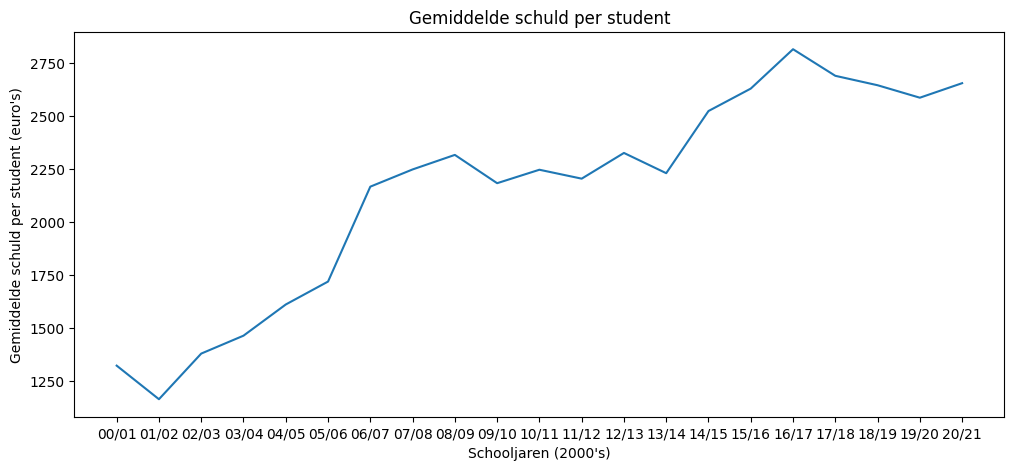

In [118]:
plt.figure(figsize=(12, 5))
plt.plot(merged_spj_uitgaven['Perioden'], merged_spj_uitgaven['avg_debt_per_student'])
plt.xlabel('Schooljaren (2000\'s)')
plt.ylabel('Gemiddelde schuld per student (euro\'s)')
plt.title('Gemiddelde schuld per student')

plt.show()

_De gemiddelde schuld per student vertoonde over de jaren heen over het algemeen een stijgende trend. Het bereikte het laagste punt in 2001 (€1475), steeg geleidelijk naar €2500 in 2007 en bleef relatief stabiel tot 2013. Van 2013 tot 2016 maakte het een sterke stijging door, met een piek van €3000. Deze stijging is gedeeltelijk te verklaren door het feit dat in deze periode de basisbeurs overging naar het leenstelsel. Na 2016 nam de gemiddelde schuld per student geleidelijk af tot €2600 in 2019. De trend suggereert dat de schuld, zonder verandering,  in de toekomst blijft stijgen. Dit blijkt uit de stijgende lijn tot en met 2020. De informatie over 2021 en 2022 was (nog) niet beschikbaar in de dataset van het CBS. Belangrijk om te benoemen: in de dataset van het CBS is de schuld inclusief de basisbeurs, ook al wordt deze omgezet in een gift._

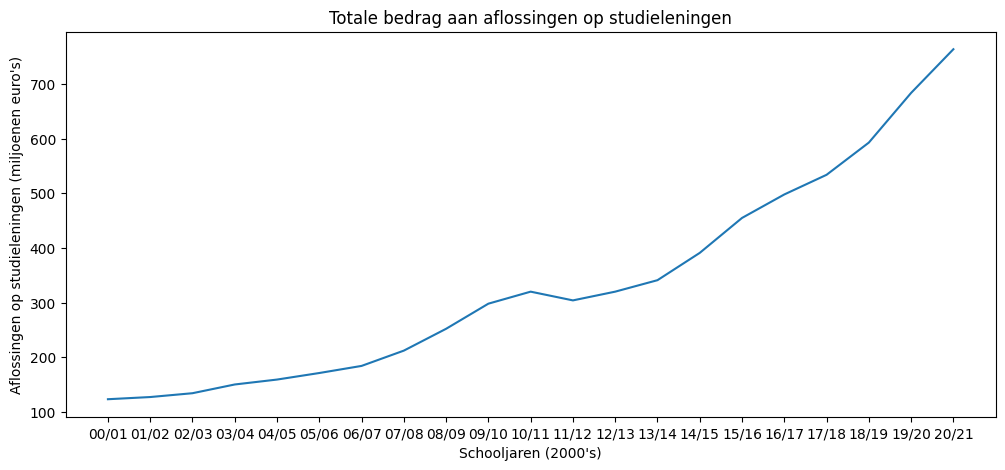

In [119]:
plt.figure(figsize=(12, 5))
plt.plot(merged_spj_uitgaven['Perioden'], merged_spj_uitgaven['AflossingenOpStudieleningen_30'])
plt.xlabel('Schooljaren (2000\'s)')
plt.ylabel('Aflossingen op studieleningen (miljoenen euro\'s)')
plt.title('Totale bedrag aan aflossingen op studieleningen')

plt.show()

_Het totale bedrag aan aflossingen op studieleningen stijgt over de jaren heen aanzienlijk. In 2000 was dit bedrag rond de 120 miljoen euro. In 2020 was dit ruim 750 miljoen euro. Dit komt neer op een stijging van meer dan 500% in een periode van 20 jaar._

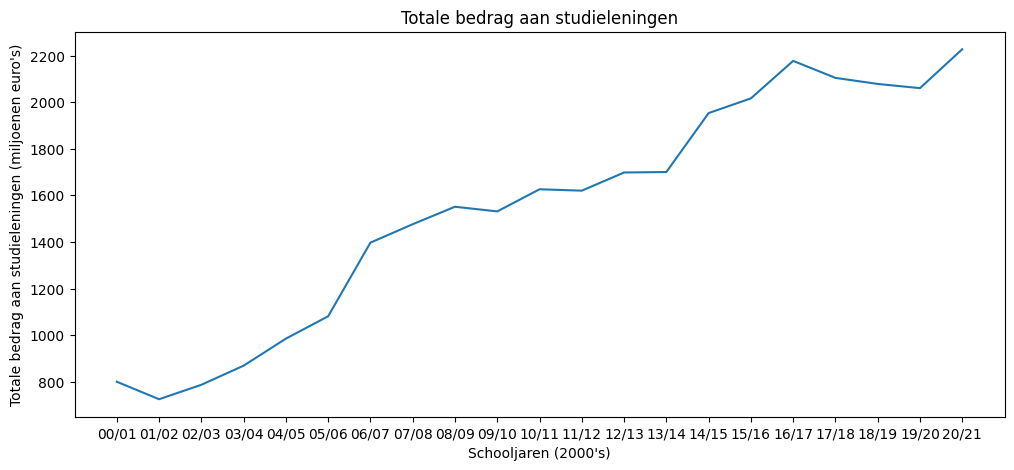

In [120]:
plt.figure(figsize=(12, 5))
plt.plot(merged_spj_uitgaven['Perioden'], merged_spj_uitgaven['StudiefinancieringLeningen_14'])
plt.xlabel('Schooljaren (2000\'s)')
plt.ylabel('Totale bedrag aan studieleningen (miljoenen euro\'s)')
plt.title('Totale bedrag aan studieleningen')

plt.show()

_Het totale bedrag aan studieleningen gematigd door de jaren heen. In 2000 was dit bedrag rond de 800 miljoen euro. In 2020 was dit rond de 2200 miljoen euro. Dit komt neer op een stijging van 175% in een periode van 20 jaar. Deze stijging is in vergelijking met het bedrag aan aflossingen een stuk minder sterk gestegen._

# Reflectie

TBD (moet op basis van feedback dat we nog moeten krijgen)

# Werkverdeling

Abe: Groepsgenoten bij elkaar gezocht. Onderwerp bedacht. Het Jupyter Book via GitHub Pages online gezet. Tekst in Jupyter Notebook gezet. Datasets gedownload. Vijf lijngrafieken gemaakt. Printscreens gemaakt van heads datasets. Verdiept in onderwerp en opvallende gegevens genoteerd en daar mogelijke visualisaties bij bedacht.

Sam: Introductie geschreven. Beschrijvingen geschreven over twee datasets en de voorbewerking daarvan. Twee gebruikte datasets gevonden (Onderwijs; Uitgaven Aan Onderwijs En CBS/OESO Indicatoren & Leerlingen En Studenten; Onderwijssoort, Woonregio). Meegeholpen bij het bepalen van de twee verschillende perspectieven.

Sem: Contact gelegd met Abe om een groep te vormen. Datasets gefilterd. Datasets gemerged op jaren. Nieuwe relevante columns gecreëerd op basis van bestaande columns. Een aantal visualisaties bedacht en uitgewerkt. Diverse lijn grafieken gemaakt en de relevantie bepaald. Vindingen per grafiek opgeschreven en koppelingen met het onderwerp gemaakt. 

Shilana: Grafiek gemaakt met percentuele toenamen studenten per jaar. Meegedacht met het interpreteren van de datasets. Meegedacht met het kiezen van het onderwerp. Meegedacht met het maken van de opzet. Controlleren van het eindproduct op fouten.

# Literatuurlijst


Leerlingen en studenten; onderwijssoort, woonregio. (n.d.). CBS Statline. https://opendata.cbs.nl/statline#/CBS/nl/dataset/71450ned/table?ts=1687175132506

Onderwijs; uitgaven aan onderwijs en CBS/OESO indicatoren. (n.d.). CBS Statline. https://opendata.cbs.nl/statline#/CBS/nl/dataset/80393ned/table?ts=1686669534168

Ministerie van Algemene Zaken. (2023, 12 juni). Herinvoering basisbeurs en tegemoetkoming studenten. Hoger onderwijs | Rijksoverheid.nl. https://www.rijksoverheid.nl/onderwerpen/hoger-onderwijs/herinvoering-basisbeurs-en-tegemoetkoming
